In [13]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

# function to plot vectors with arrows

def plot_vectors(**kwargs):
    M = []
    for key, value in kwargs.items():
        if isinstance(value, np.ndarray):
            value = value.tolist()

        for i, v in enumerate(value):
            if isinstance(v, np.ndarray):
                value[i] = value[i].tolist()

            if not isinstance(value[0], list):
                value = [[0,0], value]

        M.append([key] + value)

    plt.figure(figsize=(12,12))
    ax = plt.axes()
    ax.grid(visible=True, which='both')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True)); ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_aspect('equal', 'box')
    cmap = plt.get_cmap('nipy_spectral')
    lc = np.linspace(0.03, 0.99, 20)
    colors = cmap(np.insert(lc[::2], range(10), lc[::-2]))

    for i in range(len(M)):
        l = 0; pos = []

        for j in range(0, len(M[i][1])):
            pos.append(M[i][2][j] - M[i][1][j])
            l += (pos[j])**2
            pos[j] = pos[j] / 2 + M[i][1][j]

        l = l**0.5
#      ax.text(pos[0], pos[1], f'{M[i][0]}={l:.2f}', size=18)
 # uncomment if you want the names and values for each vector
       # ax.text(pos[0], pos[1], f'{M[i][0]}={tuple(M[i][2])}', size=18)
        ax.text(pos[0], pos[1], f'{M[i][0]}', size=18)
    ax.grid(visible=True, which='both')
    
    ##############################
    # arrows
    x, y, u, v = zip(*[(i[1][0], i[1][1], i[2][0] - i[1][0], i[2][1] - i[1][1]) for i in M])
    
    #print the arrows
    ax.quiver(x, y, u, v, angles='xy', scale_units='xy', scale=1., color=colors[:len(M)])

    ##############################
    # axes
    # set the x-spine
    ax.spines['left'].set_position('zero')

    # turn off the right spine/ticks
    ax.spines['right'].set_color('none')
    ax.yaxis.tick_left()

    # set the y-spine
    ax.spines['bottom'].set_position('zero')

    # turn off the top spine/ticks
    ax.spines['top'].set_color('none')
    ax.xaxis.tick_bottom()

    #########################
    # labels
    #    ax.set_xlabel(r'$\vec{i}$',fontsize=16)
    #    ax.set_ylabel(r'$\vec{i}$',fontsize=16)
    ax.set_xlabel('eix X',fontsize=16)
    ax.set_ylabel('eix Y',fontsize=16)
#    ax.set_title(r'\TeX\ is Number $\sum_{n=1}^\infty'
#               r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')


    ax.plot(np.array(x)+np.array(u), np.array(y)+np.array(v), np.array(x), np.array(y), visible=False)

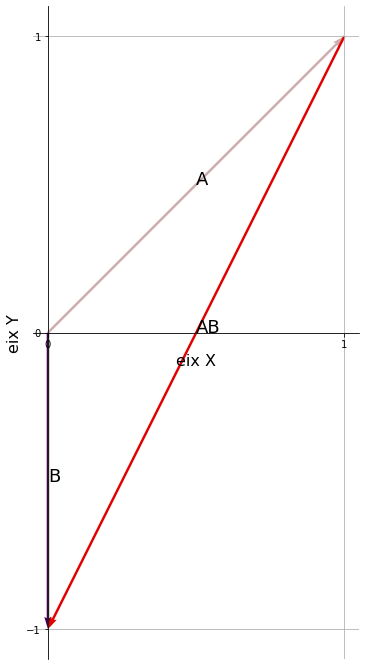

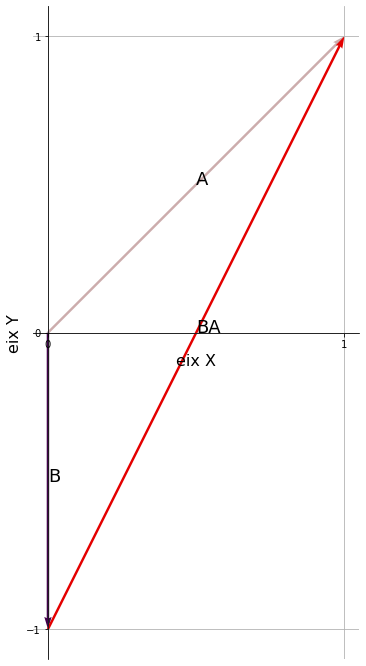

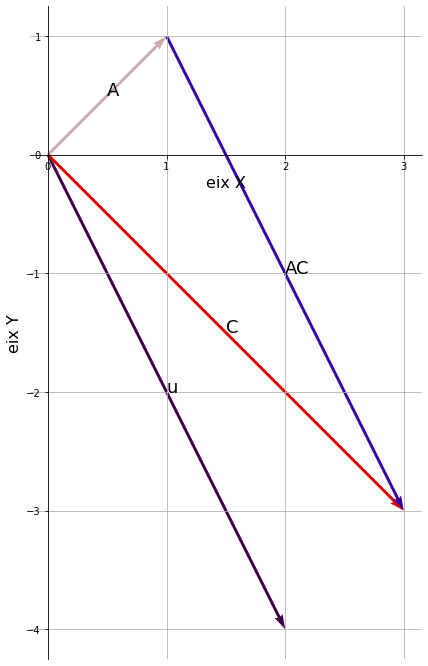

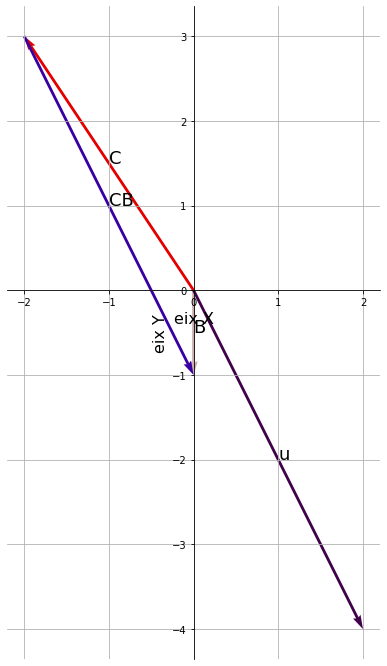

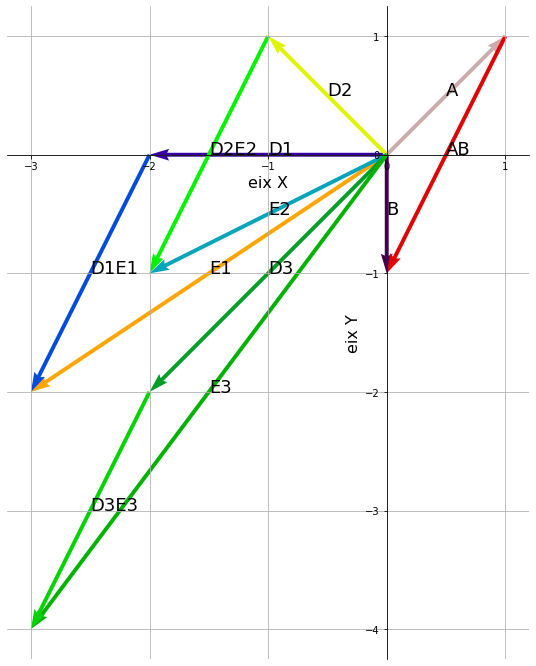

In [14]:
# 
# plots for sum of vectors
# ex_OperacionsVectors1.tex
#
A = [1,1]
B = [0,-1]
u=[2,-4]

#i= [1,0]
#j=[0,1]
# example of uses
#plot_vectors(a=np.array(a), b=b, d=d, e=np.array([d,np.array(b)]), ab=[a,b])
plot_vectors(A=A, B=B, AB=[A,B])
plt.savefig('figures/vectorAB.png')
plot_vectors(A=A, B=B, BA=[B,A])
plt.savefig('figures/vectorBA.png')
C=np.add(A,u)
plot_vectors(A=A, u=u, C=C,AC=[A,C])
plt.savefig('figures/vectorC1.png')
C=np.subtract(B,u)
plot_vectors(B=B, u=u, C=C,CB=[C,B])
plt.savefig('figures/vectorC2.png')
AB=np.subtract(B,A)
D1=[-2,0]
E1=np.add(D1,AB)
D2=[-1,1]
E2=np.add(D2,AB)
D3=[-2,-2]
E3=np.add(D3,AB)
plot_vectors(A=A, B=B, AB=[A,B], D1=D1, E1=E1, D1E1=[D1,E1],  D2=D2, E2=E2, D2E2=[D2,E2],D3=D3, E3=E3, D3E3=[D3,E3])
plt.savefig('figures/vectorDE.png')

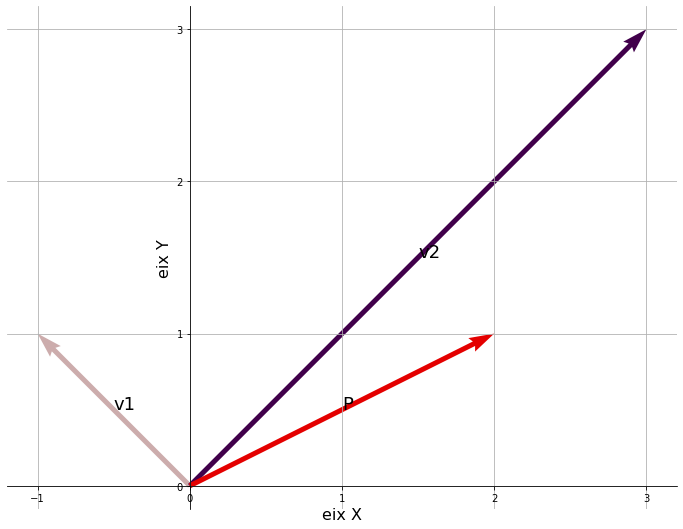

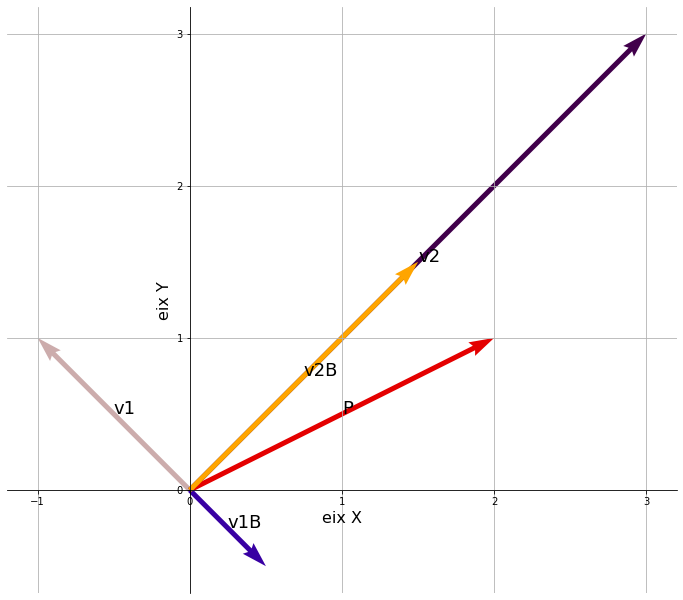

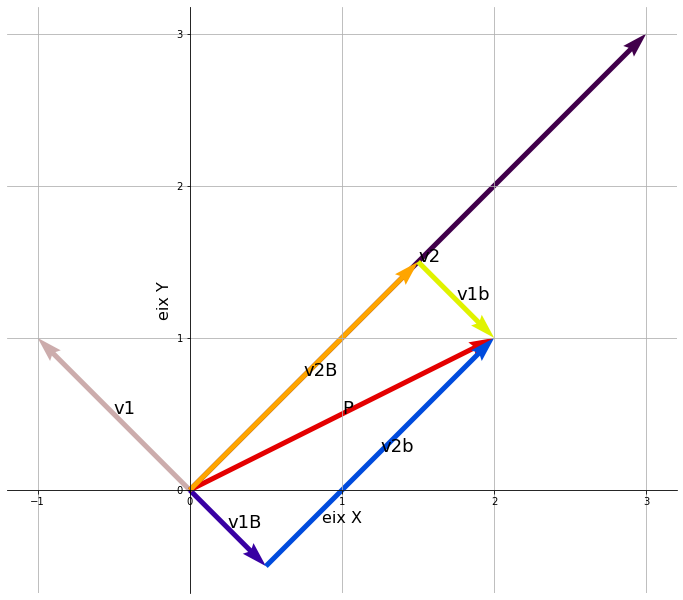

In [15]:
# 
# plots for basis change
#
a = [-1,1]
b = [3,3]
c = [2,1]
d = [3,-2]
a2=[0.5,-0.5]
b2=[1.5,1.5]

#i= [1,0]
#j=[0,1]
# example of uses
#plot_vectors(a=np.array(a), b=b, d=d, e=np.array([d,np.array(b)]), ab=[a,b])
plot_vectors(v1=a, v2=b, P=c)
plt.savefig('figures/canvidebase.png')
plot_vectors(v1=a, v2=b, P=c, v1B=a2, v2B=b2)
plt.savefig('figures/canvidebase2.png')
plot_vectors(v1=a, v2=b, P=c, v1B=a2, v2B=b2,v2b=[a2,c],v1b=[b2,c])
plt.savefig('figures/canvidebase3.png')

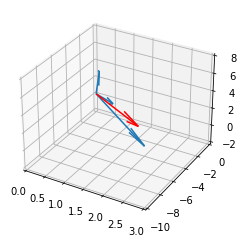

In [17]:
#
# plot vectors in 3D
#

import matplotlib.pyplot as plt

v =[2,-5,2]
u1=[1,-3,2]
u2 = [2,-4,-1]
u3 = [1,-5,7]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim([0,3])
ax.set_ylim([-10,0])
ax.set_zlim([-2,8])

start=[0,0,0]
ax.quiver(start[0],start[1],start[2],v[0],v[1],v[2], color='r')
ax.quiver(start[0],start[1],start[2],u1[0],u1[1],u1[2])
ax.quiver(start[0],start[1],start[2],u2[0],u2[1],u2[2])
ax.quiver(start[0],start[1],start[2],u3[0],u3[1],u3[2])
#x.view_init(0,0)